In [43]:
import pandas as pd
import numpy as np

data = pd.read_csv("./data/loan_sanction_train.csv")

print(type(data))

data.head()

# Cleaning the data #
data["Gender"] = data["Gender"].fillna("Male")
data["Married"] = data["Married"].fillna("No")
data["Dependents"] = data["Dependents"].fillna("0")
data["Self_Employed"] = data["Self_Employed"].fillna("No")
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].mean())
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())
data["Credit_History"] = data["Credit_History"].fillna("1")


# Remove the Loan_ID Column
data = data.drop(columns="Loan_ID")

# making gender a normalization
male = data['Gender'].value_counts(normalize=True)['Male']

data_gender_normalized = data['Gender'].map({'Male': male, 'Female': 1 - male, "NaN": male})

data['Gender'] = data_gender_normalized

# normalizing education
education = data['Education'].value_counts(normalize=True)["Graduate"]

data_education_normalized = data['Education'].map({'Graduate': education, 'Not Graduate': 1 - education})

data['Education'] = data_education_normalized

# normalizing self_employed
self_employed = data['Self_Employed'].value_counts(normalize=True)["Yes"]

data_selfEmp_normalized = data['Self_Employed'].map({"Yes": self_employed, "No": 1-self_employed})

data["Self_Employed"] = data_selfEmp_normalized

# normalzing property area
area_property = data["Property_Area"].value_counts(normalize=True)

print(area_property)

data_area_normalized = data["Property_Area"].map({"Urban": area_property["Urban"], "Semiurban": area_property['Semiurban'], "Rural": area_property["Rural"]})

data["Property_Area"] = data_area_normalized

# normalzing married 
married = data["Married"].value_counts(normalize=True)["Yes"]

print(married)

married_normalized = data["Married"].map({"Yes": married, "No": 1-married})

data["Married"] = married_normalized

# Switchin loan status to 0 or 1
data["Loan_Status"] = data["Loan_Status"].map({"Y": 1, "N": 0})

# Cleaning the dependents
data["Dependents"] = data["Dependents"].map({"0":0, "1":1, "2":2, "3+": 3})

print(data.isna().sum())

data_train = data.loc[:, data.columns != "Loan_Status"]
data_target = data["Loan_Status"]


<class 'pandas.core.frame.DataFrame'>
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64
0.6482084690553745
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [44]:
def ratio(a, b):
  return a/b

data['WealthToLoanRatio'] = data.apply(lambda row : ratio(row['ApplicantIncome'], row['LoanAmount']), axis = 1)

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_train.to_numpy(), data_target.to_numpy(), test_size=0.1, random_state=0)

In [46]:
from sklearn.linear_model import LogisticRegression, LinearRegression

LogisticReg = LinearRegression() #solver='newton-cholesky', max_iter=500

LogisticReg.fit(x_train, y_train)

LinearRegression()

In [94]:
predictions = LogisticReg.predict(x_test)

def myRound(x):
    if x < .32 :
        return 0
    else:
        return 1

predictions = [myRound(x) for x in predictions]

In [95]:
from sklearn import metrics
score = LogisticReg.score(x_test, y_test)
print(score)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

0.3361982549237663
[[ 8  7]
 [ 2 45]]


Text(0.5, 1.0, 'Accuracy Score: 0.8548387096774194')

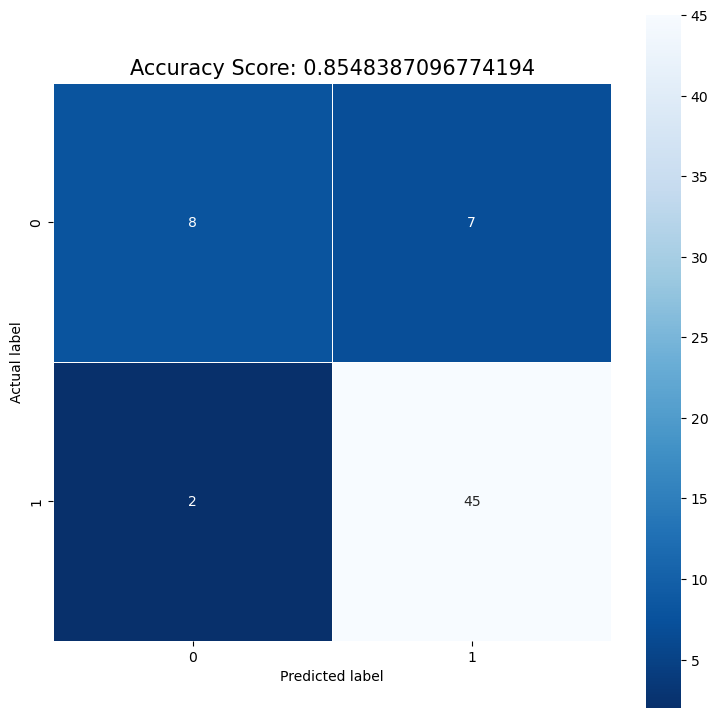

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score


# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


print('accuracy : ', accuracy_score(y_test, predictions))
print('precision : ', precision_score(y_test, predictions))
print('recall : ', recall_score(y_test, predictions))

mean_squared_error :  0.24193548387096775
mean_absolute_error :  0.24193548387096775
accuracy :  0.7580645161290323
precision :  0.7580645161290323
recall :  1.0


In [18]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

from numpy import mean
from numpy import absolute
from numpy import sqrt

cv = LeaveOneOut()

scores = cross_val_score(LogisticReg, data_train, data_target, scoring="accuracy", cv=cv, n_jobs=-1)

scores_accurate = np.count_nonzero(scores == 1)

scores_accurate/len(scores)

0.0

In [98]:
print(LogisticReg.coef_)

print(data.columns)

[-1.05869769e-02  3.06273485e-01  9.04161082e-03  1.01775056e-01
 -7.19164013e-03  1.42483874e-06 -1.22375150e-05 -3.13712308e-04
 -1.39954112e-04  7.00223225e-01  1.50815810e+00]
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'WealthToLoanRatio'],
      dtype='object')


In [219]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',